## import

In [1]:
import os
import math
import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import cv2
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
%matplotlib inline

# 追記

## main

In [2]:
# 読み込み
# org_img = cv2.imread("./source/book.jpg")
org_img = cv2.imread("./source/book1.jpg")
img_height = org_img.shape[0]
img_width = org_img.shape[1]
img_center = (int(img_width/2), int(img_height/2))


In [3]:
# 白黒
gray_img = cv2.cvtColor(org_img , cv2.COLOR_BGR2GRAY)
# 2値化
_, gray_img = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
#ケニー処理 結局使わなかった
c_img = cv2.Canny(gray_img, 10, 255)

In [4]:
# 輪郭認識
# contours, hierarchy = cv2.findContours(c_img,  cv2.RETR_LIST,  cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(gray_img,  cv2.RETR_LIST,  cv2.CHAIN_APPROX_SIMPLE)

In [5]:
area_size=[ ]

for i in range(0, len(contours)):
    area_size.append([contours[i],cv2.contourArea(contours[i])])

area_size.sort(key=lambda x: x[1], reverse=True)

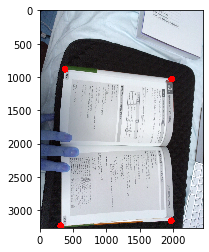

In [6]:
# なぜかarea_sizeで最も大きいはずの一番外側が出てこない
# これで四つ角がとれる
epsilon = 0.1 * cv2.arcLength( area_size[0][0], True )
approx = cv2.approxPolyDP( area_size[0][0], epsilon, True )
tst_img = org_img.copy()
cv2.drawContours(tst_img, approx, -1,(255, 0, 0),100)
plt.imshow(tst_img)

In [7]:
side_point_dict = {}
for tmp_point in approx:
    if img_center[0] < tmp_point[0][0]:
        if img_center[1] < tmp_point[0][1]:
            side_point_dict["right_down"] = tmp_point
        else:
            side_point_dict["right_up"] = tmp_point
            
    else :
        if img_center[1] < tmp_point[0][1]:
            side_point_dict["left_down"] = tmp_point
        else:
            side_point_dict["left_up"] = tmp_point
        

In [8]:
side_point_dict

{'left_up': array([[375, 888]], dtype=int32),
 'left_down': array([[ 309, 3229]], dtype=int32),
 'right_down': array([[1960, 3155]], dtype=int32),
 'right_up': array([[1966, 1034]], dtype=int32)}

In [9]:
# print("x",x,"y",y,"w",w,"h",h)

In [10]:
# 座標の対応に注意して、数を合わせる
perspective1 = np.float32([side_point_dict["left_down"],
                           side_point_dict["right_down"],
                           side_point_dict["right_up"],
                           side_point_dict["left_up"] ])

x,y,w,h = cv2.boundingRect(area_size[0][0])
# perspective2 = np.float32([[y, x],[y, x+w], [y+h, x+h],[y+h, x]]) # 逆にしたけど、、
perspective2 = np.float32([[x, y+h],[x+w, y+h], [x+w, y],[x, y]])

psp_img = cv2.getPerspectiveTransform(perspective1,perspective2)
img_psp = cv2.warpPerspective(tst_img, psp_img,(x+w,h+y))

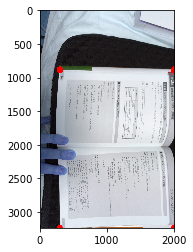

In [11]:
plt.imshow(img_psp)

## 矩形・回転 

In [12]:
rct_img = img_psp[y : y+h, x : x+w]

rct_rtt_img = cv2.rotate(rct_img, cv2.ROTATE_90_CLOCKWISE)

## 表示エリア

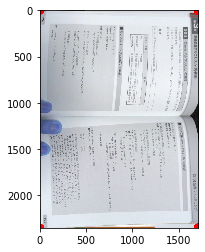

In [13]:
# plt.imshow(rct_rtt_img)
plt.imshow(rct_img)

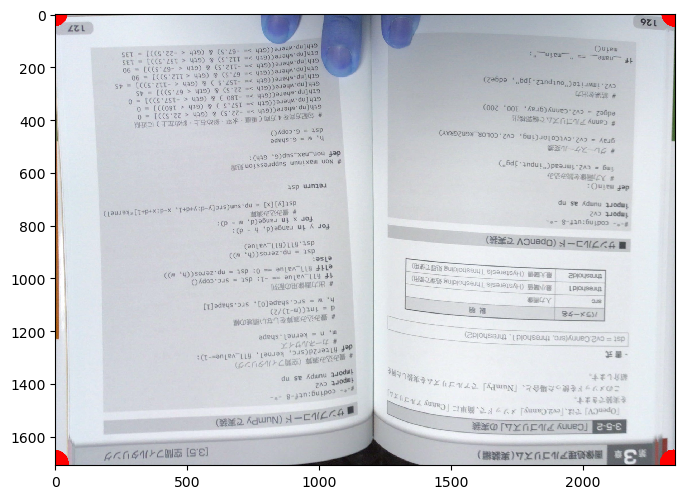

In [14]:
# plt.imshow(rct_rtt_img)
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(rct_rtt_img)

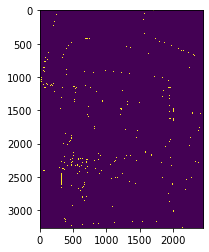

In [15]:
plt.imshow(c_img)
plt.show()

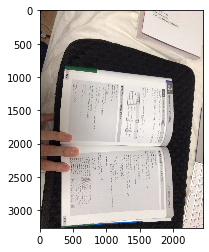

In [16]:
im4p = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()

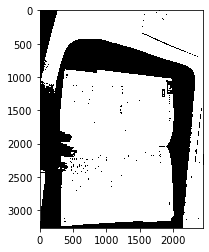

In [17]:
#  2値化の結果
im4p = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()

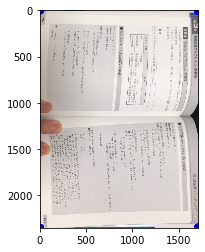

In [18]:
#  矩形画像
im4p = cv2.cvtColor(rct_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()

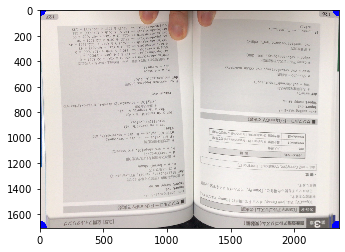

In [19]:
# 矩形回転
im4p = cv2.cvtColor(rct_rtt_img, cv2.COLOR_BGR2RGB)
plt.imshow(im4p)
plt.show()


In [20]:
contours

[array([[[2337, 3238]],
 
        [[2338, 3237]],
 
        [[2339, 3238]],
 
        [[2338, 3239]]], dtype=int32),
 array([[[2241, 3231]],
 
        [[2242, 3230]],
 
        [[2243, 3230]],
 
        [[2244, 3231]],
 
        [[2242, 3233]],
 
        [[2241, 3232]]], dtype=int32),
 array([[[2244, 3230]],
 
        [[2245, 3229]],
 
        [[2246, 3229]],
 
        [[2247, 3230]],
 
        [[2246, 3231]],
 
        [[2245, 3231]]], dtype=int32),
 array([[[2351, 3200]],
 
        [[2352, 3199]],
 
        [[2353, 3200]],
 
        [[2352, 3201]]], dtype=int32),
 array([[[2347, 3200]],
 
        [[2348, 3199]],
 
        [[2349, 3200]],
 
        [[2349, 3201]],
 
        [[2348, 3202]],
 
        [[2347, 3201]]], dtype=int32),
 array([[[2247, 3200]],
 
        [[2248, 3199]],
 
        [[2249, 3200]],
 
        [[2248, 3201]]], dtype=int32),
 array([[[2246, 3199]],
 
        [[2247, 3198]],
 
        [[2248, 3199]],
 
        [[2247, 3200]]], dtype=int32),
 array([[[2349, 3198]],
 